In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import plotly.express as px

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

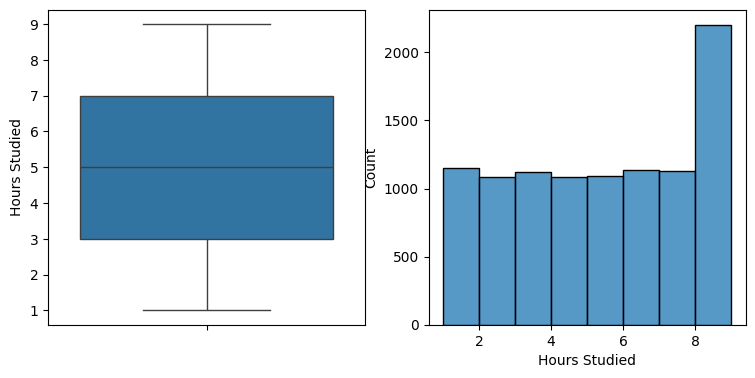

In [5]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
sns.boxplot(data=df['Hours Studied'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(data=df['Hours Studied'], bins=8)
plt.show()


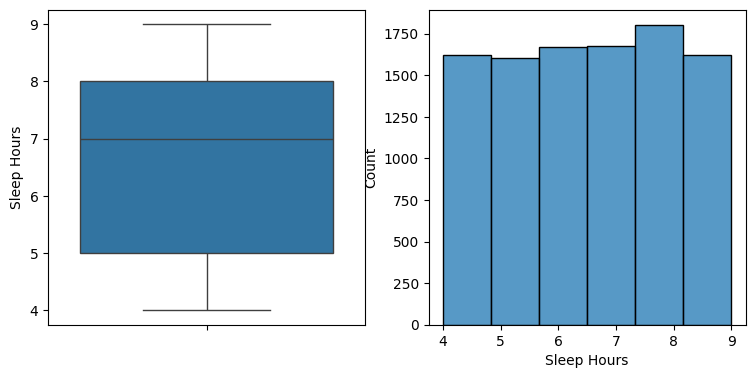

In [6]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
sns.boxplot(data=df['Sleep Hours'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(data=df['Sleep Hours'], bins=6)
#sns.boxplot(data=df['Sleep Hours'])
plt.show()

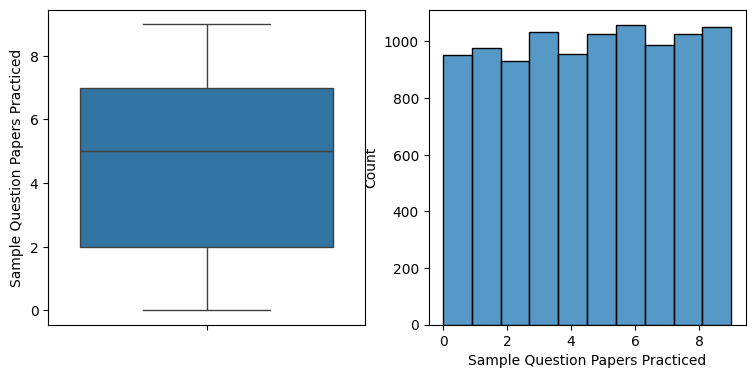

In [7]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
sns.boxplot(data=df['Sample Question Papers Practiced'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(data=df['Sample Question Papers Practiced'], bins=10)
plt.show()

<Axes: xlabel='Extracurricular Activities', ylabel='Count'>

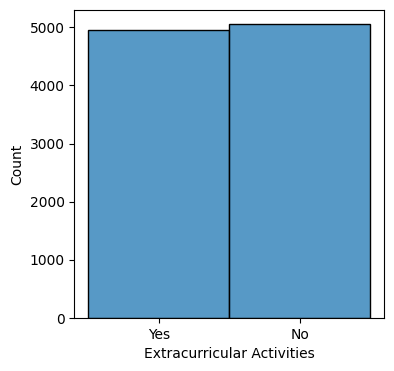

In [8]:
plt.figure(figsize=(4, 4))

sns.histplot(data=df['Extracurricular Activities'], bins=2)

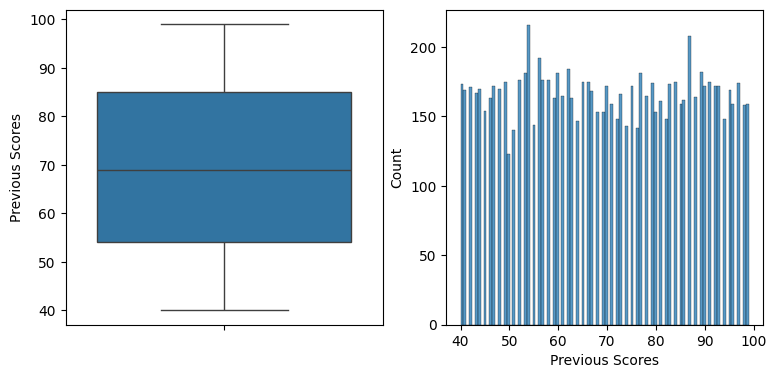

In [9]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
sns.boxplot(data=df['Previous Scores'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(data=df['Previous Scores'], bins=100)
plt.show()

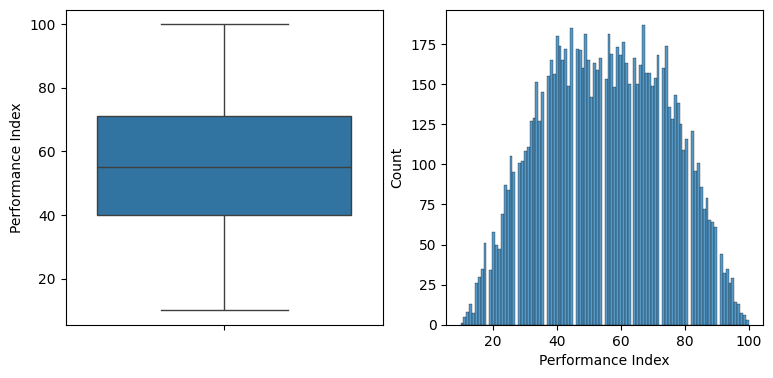

In [10]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
sns.boxplot(data=df['Performance Index'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(data=df['Performance Index'], bins=100)
plt.show()

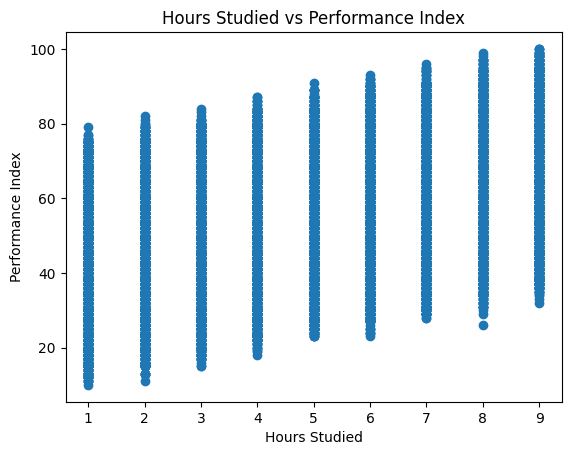

In [11]:
plt.scatter(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs Performance Index')
plt.show()


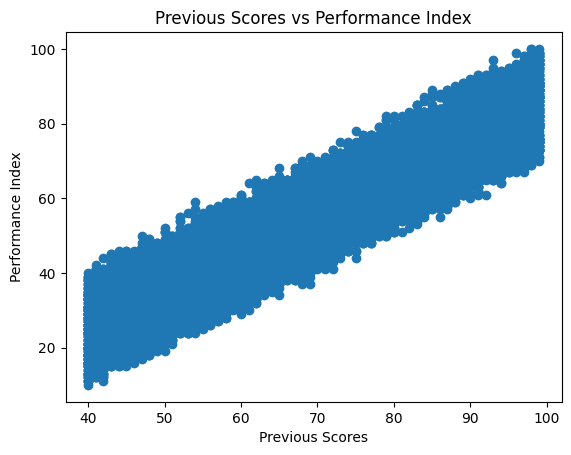

In [12]:
plt.scatter(df['Previous Scores'], df['Performance Index'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs Performance Index')
plt.show()

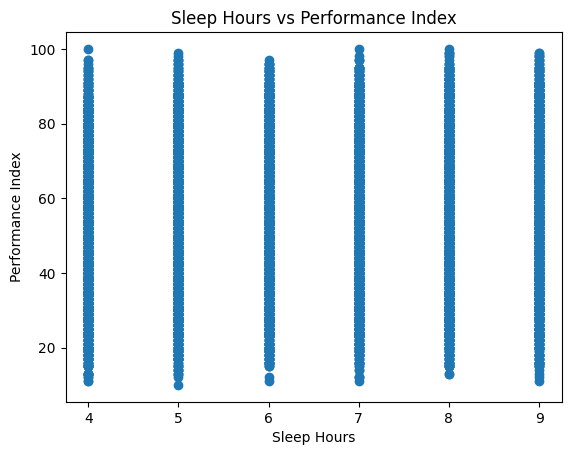

In [13]:
plt.scatter(df['Sleep Hours'], df['Performance Index'])
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Sleep Hours vs Performance Index')
plt.show()


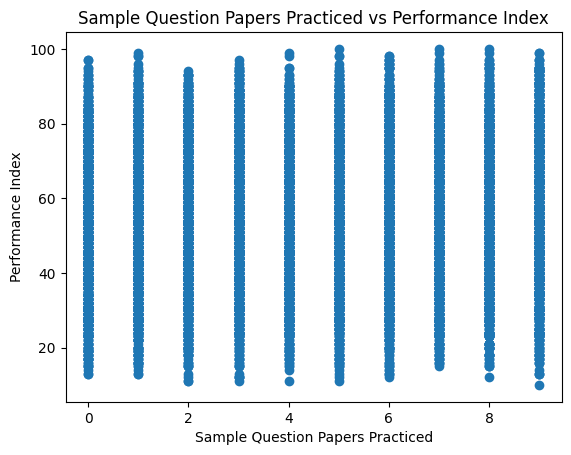

In [14]:
plt.scatter(df['Sample Question Papers Practiced'], df['Performance Index'])
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Sample Question Papers Practiced vs Performance Index')
plt.show()

In [15]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

#X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [16]:
one_hot_encoded = pd.get_dummies(X['Extracurricular Activities'], prefix='ex_act')
X_ohe = pd.concat([X, one_hot_encoded], axis=1).drop(columns=['Extracurricular Activities'])
X_ohe

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,ex_act_No,ex_act_Yes
0,7,99,9,1,False,True
1,4,82,4,2,True,False
2,8,51,7,2,False,True
3,5,52,5,2,False,True
4,7,75,8,5,True,False
...,...,...,...,...,...,...
9995,1,49,4,2,False,True
9996,7,64,8,5,False,True
9997,6,83,8,5,False,True
9998,9,97,7,0,False,True


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.25, random_state=42)

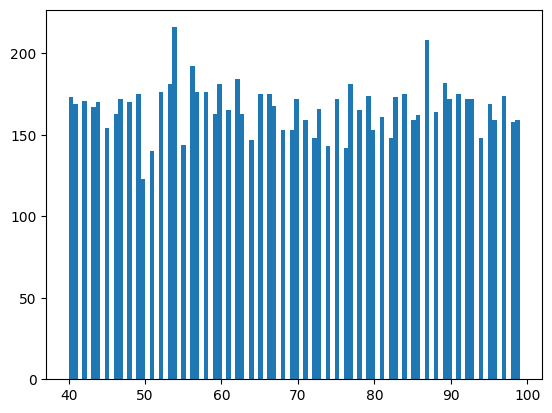

In [18]:
import matplotlib.pyplot as plt

plt.hist(df['Previous Scores'], bins=100)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

continous_columns = ['Previous Scores']
mm = MinMaxScaler()
X_train[continous_columns] = mm.fit_transform(X_train[continous_columns])
X_test[continous_columns] = mm.transform(X_test[continous_columns])

X_train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,ex_act_No,ex_act_Yes
4901,5,0.152542,5,5,True,False
4375,7,0.813559,4,9,False,True
6698,3,0.915254,7,1,False,True
9805,9,0.237288,5,9,False,True
1101,4,0.271186,8,6,False,True
...,...,...,...,...,...,...
5734,8,0.169492,6,6,False,True
5191,4,0.474576,9,3,True,False
5390,9,0.135593,7,6,True,False
860,1,0.118644,9,0,True,False


## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
c = lr.intercept_
c

7.077216786766499

In [22]:
m = lr.coef_
m

array([ 2.85492123, 59.96637037,  0.47688351,  0.19092346, -0.29185465,
        0.29185465])

In [23]:
Y_pred_test = lr.predict(X_test)
Y_pred_test

array([54.73187888, 22.61211054, 47.90838844, ..., 68.07396952,
       53.68636805, 54.85816372])

In [24]:
from sklearn.metrics import mean_squared_error

cm = mean_squared_error(y_test, Y_pred_test)
cm

4.032544215419112

In [25]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Y_pred_test)
mape = mae / y_test.mean()
mape

0.029236132222469242

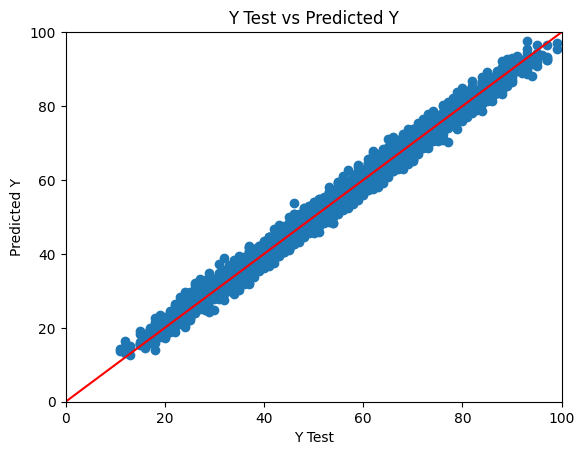

In [26]:
plt.scatter(y_test, Y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Y Test vs Predicted Y')
plt.plot([0, 100], [0, 100], color='red')
plt.show()


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

Y_pred_test_rf = rf.predict(X_test)
Y_pred_test_rf

array([56.24666667, 21.64      , 46.32      , ..., 67.91833333,
       55.56      , 54.508     ])

In [29]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Y_pred_test_rf)
mape = mae / y_test.mean()
mape

0.03325302613859638

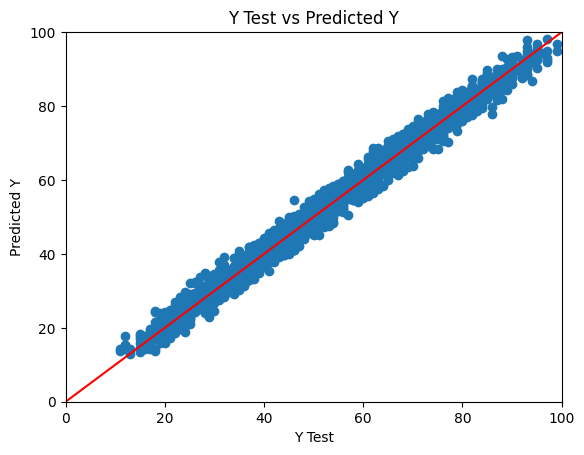

In [28]:
plt.scatter(y_test, Y_pred_test_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Y Test vs Predicted Y')
plt.plot([0, 100], [0, 100], color='red')
plt.show()

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

Y_pred_test_dt = dt.predict(X_test)
Y_pred_test_dt


array([55., 21., 45., ..., 66., 56., 55.])

In [32]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Y_pred_test_dt)
mape = mae / y_test.mean()
mape

0.04285313422638654

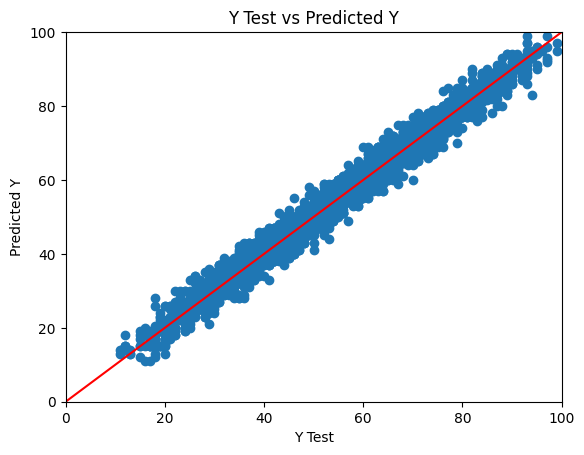

In [33]:
plt.scatter(y_test, Y_pred_test_dt)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Y Test vs Predicted Y')
plt.plot([0, 100], [0, 100], color='red')
plt.show()